In [28]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
import os 
import seaborn as sns


In [3]:
def get_ordered_subdirectories(directory):
    entries = os.listdir(directory)
    subdirs = [os.path.join(directory, entry) for entry in entries if os.path.isdir(os.path.join(directory, entry))]
    subdirs.sort()
    
    return subdirs

base = os.path.join(os.getcwd(),"ExperimentLogs")
ordered_subdirs = get_ordered_subdirectories(base)
last_exp = ordered_subdirs[-2] # Acces latest experiment run 
print(last_exp)

C:\Users\zogaj\PycharmProjects\MA\ExperimentLogs\Z_FirstSuccess


In [4]:
def load_all_pickles(directory:str, model: str, graphtype: str) -> list:
    """
    Iterates over all pickle files in the specified directory and loads them.
    
    :param directory: Path to the directory containing the pickle files
    :return: A list of loaded objects from the pickle files
    """
    loaded_objects = []
    final_path = os.path.join(directory, model, graphtype)
    
    # Iterate over all files in the directory
    for filename in os.listdir(final_path):
        if filename[0] == "o": #  output_.pkl
            file_path = os.path.join(final_path, filename)
            with open(file_path, 'rb') as file:
                loaded_objects.append(pickle.load(file))
    
    return loaded_objects
 

## Store the results of all Model/Scenario Combinations 

In [7]:
# Graphtype must match with the names specified in config.py 
res_gcn_noise = load_all_pickles(directory=last_exp,model="GCN",graphtype="noise")
res_gat_noise = load_all_pickles(last_exp, "GAT", "noise")
res_sage_noise = load_all_pickles(last_exp, "SAGE", "noise")

res_gcn_com = load_all_pickles(directory=last_exp,model="GCN",graphtype="community_relevant")
res_gat_com = load_all_pickles(last_exp, "GAT", "community_relevant")
res_sage_com = load_all_pickles(last_exp, "SAGE", "community_relevant")

res_gcn_feat = load_all_pickles(directory=last_exp,model="GCN",graphtype="cluster_relevant")
res_gat_feat = load_all_pickles(last_exp, "GAT", "cluster_relevant")
res_sage_feat = load_all_pickles(last_exp, "SAGE", "cluster_relevant")

res_gcn_perfect = load_all_pickles(last_exp, "GCN", "perfect")
res_gat_perfect = load_all_pickles(last_exp, "GAT", "perfect")
res_sage_perfect = load_all_pickles(last_exp, "SAGE", "perfect")


In [ ]:
[res_gcn_perfect[i]["loss_track"] for i in range(29)]

# Plot 

In [14]:
def plot_with_confidence_interval(target, color):
    """
    Plots figure for one Scenario. Used in a loop for final plot. 
    :param target: Results of the scenario.
    :param color: Color for scenario mapping. 
    :return: 
    """
 
    ys = np.array([lp["loss_track"] for lp in target]) #  loss-values @ epoch 
    avg_final_epoch = np.mean(np.array([lp["final_epoch"] for lp in target]))
    
    
    mean_ys = np.mean(ys, axis=0)
    std_ys = np.sqrt(np.var(ys, axis=0))

    ci_upper = mean_ys + 1.96 * std_ys
    ci_lower = mean_ys - 1.96 * std_ys
    x = np.arange(len(mean_ys))

    plt.plot(x, mean_ys, color=color)
    plt.fill_between(x, ci_lower, ci_upper, color=color, alpha=0.2)
    plt.axvline(x=avg_final_epoch, color=color, linestyle='--')
    



### Loss Curves

In [ ]:
for i, model in enumerate([[res_gcn_noise, res_gcn_perfect, res_gcn_com, res_gcn_feat], #  GCN
                           [res_gat_noise, res_gat_perfect, res_gat_com, res_gat_feat], #  GAT
                           [res_sage_noise, res_sage_perfect, res_sage_com, res_sage_feat]]): #  SAGE

    labels = ['noise', 'perfect', "community relevant", "cluster relevant"]  
    colors = ['blue', 'orange', 'green', "red"] 
    
    
    plt.figure()
    for target, label, color in zip(model, labels, colors):
        plot_with_confidence_interval(target, color)
        plt.plot([], [], color=color, label=label)  
    
    
    plt.xlabel('Epoch')
    plt.ylabel('Average Loss at Epoch')
    plt.title(i)
    plt.legend(loc='upper right')
    plt.show()

### Test accs 

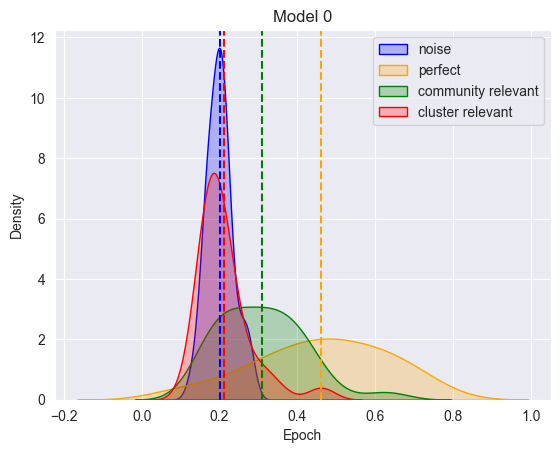

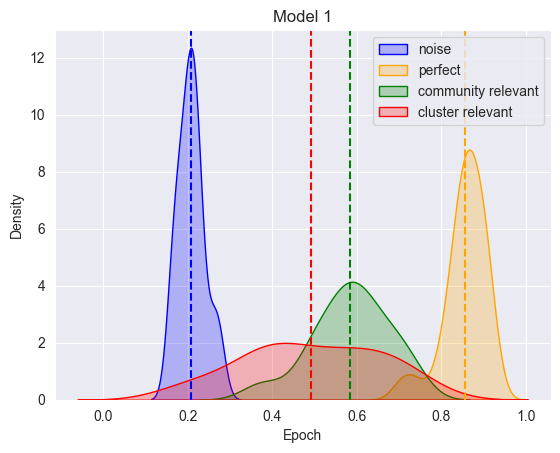

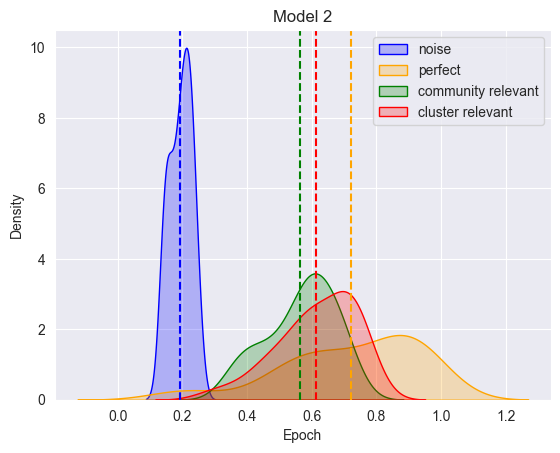

In [29]:
def plot_acc_kde(target, color, label):
    test_accs = np.array([lp["test_accuracy"] for lp in target])
    avg_acc = np.mean(test_accs)
    sns.kdeplot(test_accs, color=color, label=label, fill=True)  # Use kdeplot for density estimation
    plt.axvline(x=avg_acc, color=color, linestyle='--')
    print("Mean: ",np.round(avg_acc, 3))
    print("Std.dev: ",np.round(avg_acc, 3))
    
for i, model in enumerate([[res_gcn_noise, res_gcn_perfect, res_gcn_com, res_gcn_feat],  # GCN
                           [res_gat_noise, res_gat_perfect, res_gat_com, res_gat_feat],  # GAT
                           [res_sage_noise, res_sage_perfect, res_sage_com, res_sage_feat]]):  # SAGE

    labels = ['noise', 'perfect', "community relevant", "cluster relevant"]
    colors = ['blue', 'orange', 'green', "red"]
    
    plt.figure()
    for target, label, color in zip(model, labels, colors):
        plot_acc_kde(target, color, label)  # Call kde plot function for each target
    
    plt.xlabel('Epoch')
    plt.ylabel('Density')
    plt.title(f'Model {i}')  # More informative title
    plt.legend(loc='upper right')
    plt.show()


0.7210727969348658